In [1]:
pwd

'D:\\'

In [6]:
import pandas as pd

In [8]:
df = pd.read_csv('datasets/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
X = df.loc[:, ['PetalLengthCm', 'PetalWidthCm']]

In [10]:
import matplotlib.pyplot as plt

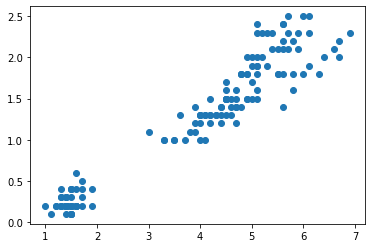

In [11]:
plt.scatter(X.PetalLengthCm, X.PetalWidthCm)

In [12]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5)
model.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 4, 4, 0, 2, 4, 0, 2, 2, 4, 4, 0, 0,
       4, 2, 4, 0, 4, 4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4])

In [13]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 4, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 0, 0, 2, 4, 4, 0, 2, 4, 0, 2, 2, 4, 4, 0, 0,
       4, 2, 4, 0, 4, 4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4])

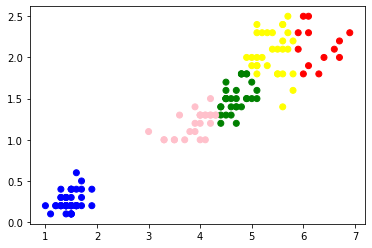

In [14]:
import numpy as np
cluster_colors = np.array(['red', 'blue', 'green', 'pink', 'yellow'])

plt.scatter(X.PetalLengthCm, X.PetalWidthCm, color=cluster_colors[model.labels_])

In [15]:
model.cluster_centers_

array([[6.28461538, 2.13846154],
       [1.464     , 0.244     ],
       [4.684375  , 1.5125    ],
       [3.884     , 1.192     ],
       [5.39666667, 2.05333333]])

# Elbow method

In [16]:
from scipy.spatial.distance import cdist

In [17]:
error = []

for k in range(1,16):
    model = KMeans(n_clusters=k)
    model.fit(X)
    # distance between points and cluster centres 
    dist = cdist(X, model.cluster_centers_)
    # only keep the distances between a point and its own cluster
    act_dist = np.min (dist, axis=1)
    # add all the distances
    total_distance_error = sum(act_dist)
    error.append(total_distance_error)
error

C:\Users\SA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[256.0398605319133,
 87.65887594972752,
 55.388565479609625,
 44.95723374524917,
 39.836118964113865,
 35.02988954248464,
 31.800963117151785,
 29.728970751152325,
 27.872587245132006,
 25.899939615673443,
 24.542513565158615,
 23.732336449452845,
 22.21705610571963,
 21.614920992276282,
 20.374453722630093]

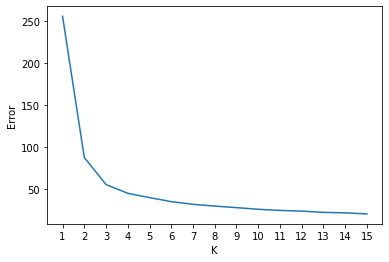

In [18]:
plt.plot(range(1,16), error)
plt.xticks(range(1,16))
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

In [20]:
error=[]
k=range(1,20)
for i in k:
    model=KMeans(i)
    model.fit(X)
    error.append(model.inertia_)

C:\Users\SA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
error

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.482389010989014,
 14.027417376142381,
 11.052733877751736,
 9.225957208237988,
 7.698331157817821,
 6.472894541406304,
 5.577974001701623,
 5.165203279007628,
 4.772109306929738,
 4.488819718124064,
 4.005808488612834,
 3.601122455501487,
 3.3101870821555153,
 3.08172840203275,
 2.8516844718748753,
 2.741908072319837]

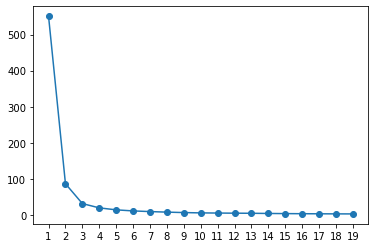

In [28]:

plt.plot(k,error,'-o')
plt.xticks(range(1,20))
plt.show()

In [30]:
X

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [32]:
pd.crosstab(X.PetalLengthCm,X.PetalWidthCm)

PetalWidthCm,0.1,0.2,0.3,0.4,0.5,0.6,1.0,1.1,1.2,1.3,...,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5
PetalLengthCm,,,,,,,,,,,,,,,,,,,,,
1.0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.3,0,4,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.4,1,8,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.5,4,6,1,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.6,0,5,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.7,0,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.9,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
